### Naive Baye's Machine learning Algorithms Implementation

In [42]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [9]:
iris = load_iris()

In [12]:
df = pd.DataFrame(data = iris.data, columns =iris.feature_names)

In [16]:
df['Target'] = iris.target

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
X = df.drop('Target',axis =1)
y = df['Target']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [33]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [37]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [39]:
y_pred = gnb.predict(X_test)

In [41]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))


1.0
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



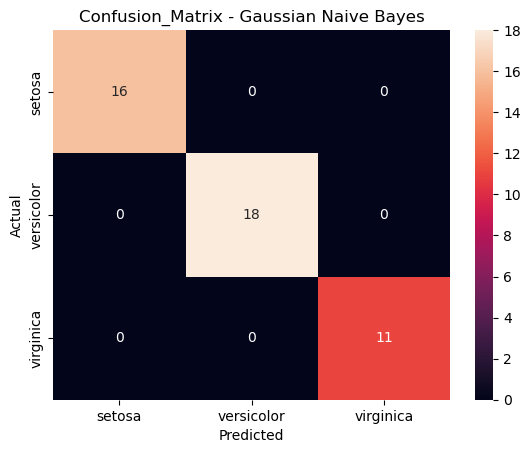

In [43]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot= True,xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion_Matrix - Gaussian Naive Bayes')
plt.show()